In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

# EDA

## Univariate Analysis

Text(0.5, 1.0, 'Gender Distribution')

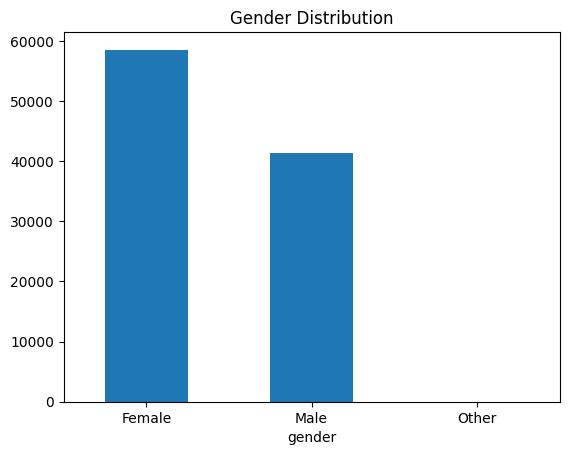

In [ ]:
df['gender'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Age Distribution')

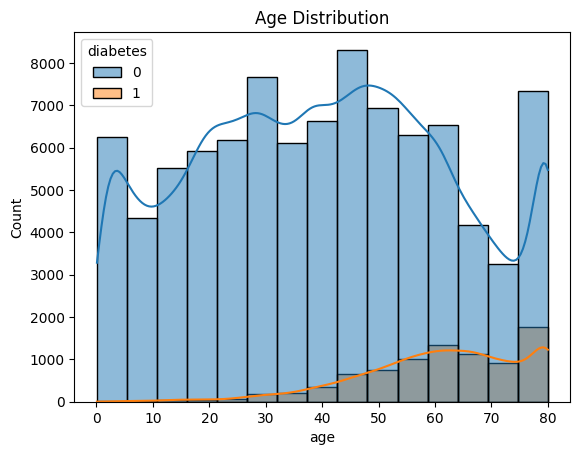

In [8]:
sns.histplot(data=df, x='age', kde=True, bins=15, hue='diabetes')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Hypertension')

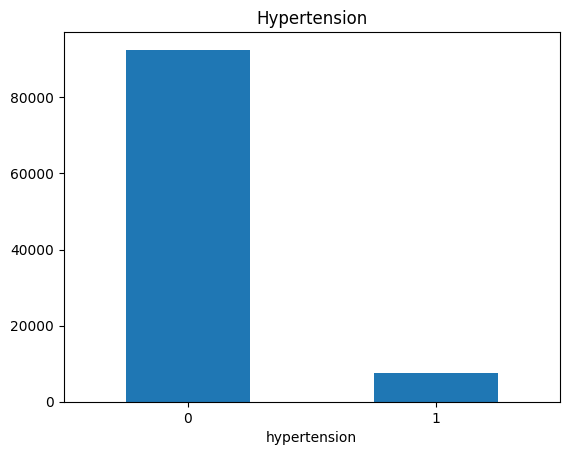

In [ ]:
df['hypertension'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Hypertension')

Text(0.5, 1.0, 'Heart Disease')

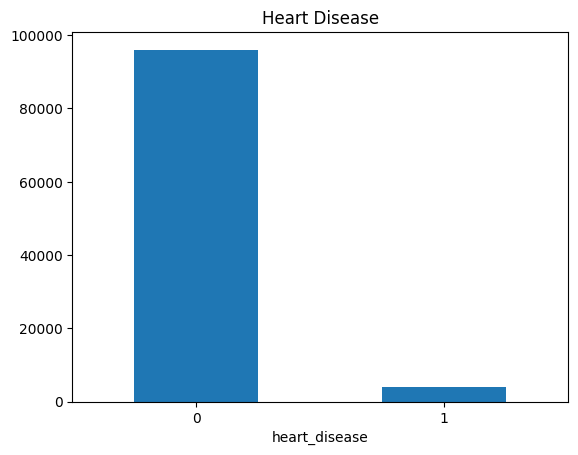

In [ ]:
df['heart_disease'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Heart Disease')

Text(0.5, 1.0, 'Diabetes')

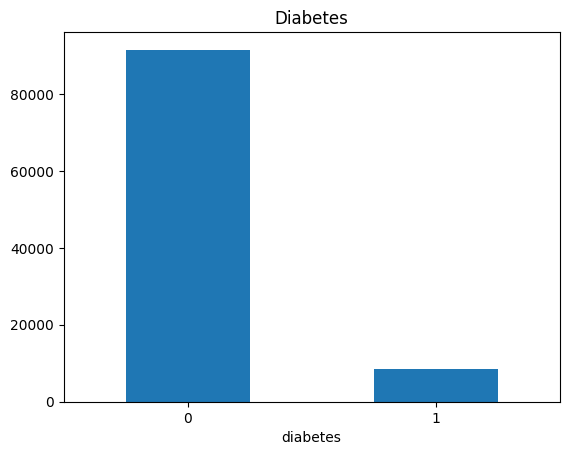

In [ ]:
df['diabetes'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Diabetes')

## Multivariate Analysis

Text(0.5, 1.0, 'Gender vs Diabetes')

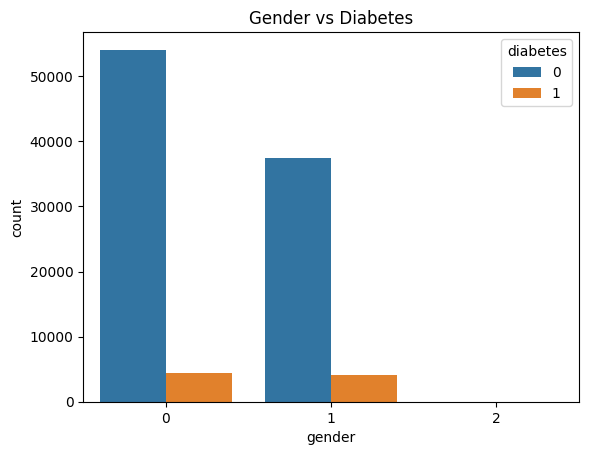

In [ ]:
df_plot = df[['gender', 'diabetes']].groupby('diabetes').value_counts().reset_index()
sns.barplot(data=df_plot, x='gender', y='count', hue='diabetes')
plt.title('Gender vs Diabetes')

From this dataset people from each gender have same amount that have diabetes

Text(0.5, 1.0, 'Blood Glucose Level vs Diabetes')

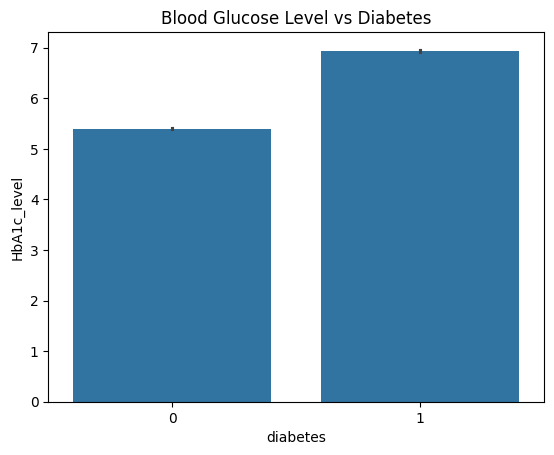

In [ ]:
sns.barplot(data=df, x='diabetes', y='HbA1c_level')
plt.title('Blood Glucose Level vs Diabetes')

People who have high HbAic level tend to have diabetes

Text(0.5, 1.0, 'Blood Glucose Level vs Diabetes')

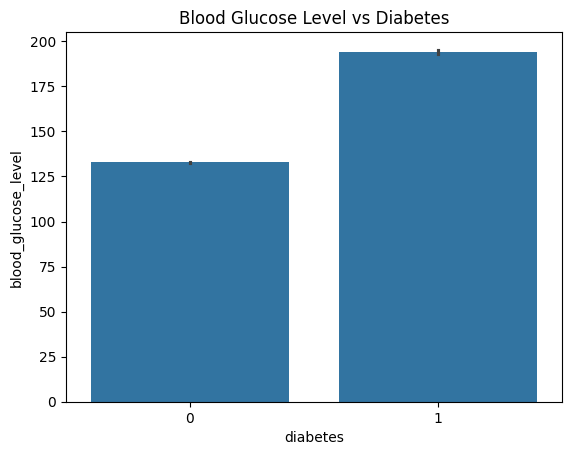

In [ ]:
sns.barplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title('Blood Glucose Level vs Diabetes')

From this plot we can see that people who have blood glucose level high tend to have diabetes

# Data Preperation

**Change categorical value into numerical value**

In [ ]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


**Find the correlation between features to target**

<Axes: >

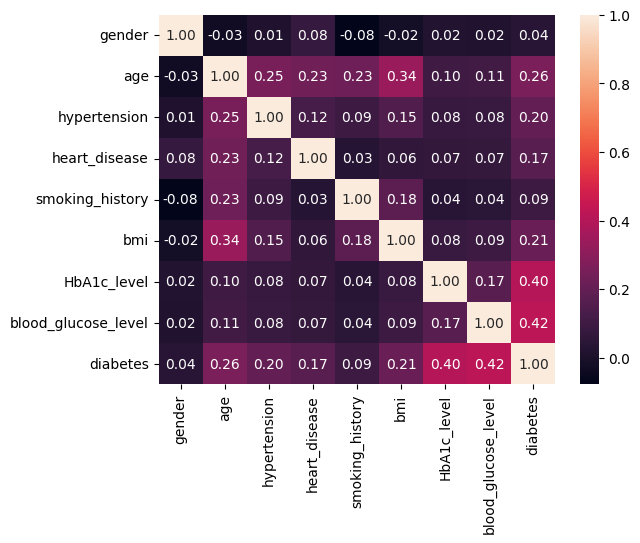

In [ ]:
corr = df.corr()
sns.heatmap(corr, fmt='.2f', annot=True)

after looking at the correlation map we can say that blood_glucose_level and HbA1c_level have the biggest correlation to target (diabetes)

**Handle Imbalence Data**

<Axes: xlabel='diabetes'>

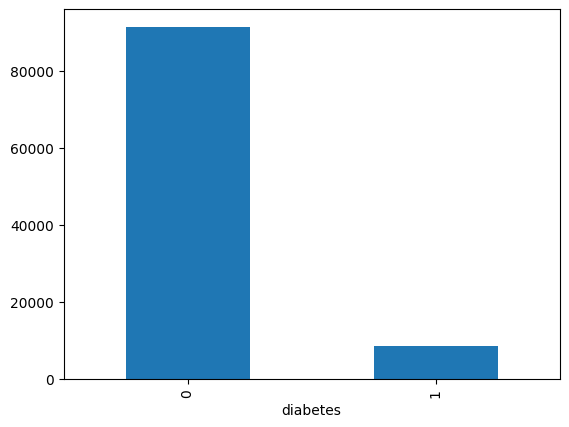

In [ ]:
df['diabetes'].value_counts().plot(kind='bar')

Base on that image our data seems like imbalence between person without diabetes and person with diabetes, so we need to make the data balance I'm choose to use under sampling method to make the data balance.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X = df.drop(columns='diabetes')
y = df['diabetes']

X_resampled, y_resampled = rus.fit_resample(X,y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Prediction

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1693
           1       0.91      0.91      0.91      1707

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



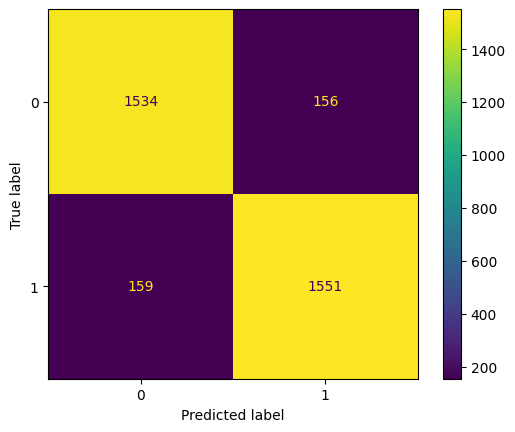

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Conclusion
After we do some visualization from dataset I can conclude that **people with high HbA1c Level and Blood Glucose Level tend to have diabetes condition**. To predict people that have diabetes I'm using **Linear Regression model** to do the prediction and I got **91% accuracy**.